In [1]:
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Conversion function for SIO-93 to SIO-98

This conversion is a polynomial that was initially expressed in terms of the number of days since the start of AGAGE. Here, converting to decimal date:

*Ray Wang (GA Tech), pers. comm:*

"ABSDA", days elapsed since the start of ALE program *(MR: inferring that this is 2nd March, 1978?)*

In addition to applying the factor from SIO-93 to SIO-98, the value also needs to be divided by a time-dependent polynomial function f(t). For ABSDA day # betwen 2252 (May 1, 1984) and 4412 (Mar. 31, 1990):

```
N2O(t)(SIO-98)= N2O(t)(SIO-93)*1.0058/f(t)
```

where:
```
f(t) = a0 + a1*t + a2*t^(2) + a3*t^(3) + a4*t^(4)
t = (ABSDA-3227)/365.25
a0:  1.00664
a1: -0.56994e-3
a2: -0.65398e-3
a3:  0.13083e-3
a4: -0.20742e-4
```

3227 corresponds to Jan. 1, 1987. Please be aware the f(t) function is based on day (e.g. ABSDA), all data within the same date is adjusted by the same f(t) (not varying with different hours, minutes).


In [2]:
# Define list of coefficients

a0 = 1.00664
a1 = -0.56994e-3
a2 = -0.65398e-3
a3 = 0.13083e-3
a4 = -0.20742e-4

coeffs = [a4, a3, a2, a1, a0]

In [3]:
# Construct function in sympy
x, t, d = sp.Symbol('x'), sp.Symbol('t'), sp.Symbol('d')

ft = 1.0058/sp.Poly.from_list(coeffs, gens=sp.Symbol('t'))
ft

1.0058/(-2.0742e-5*t**4 + 0.00013083*t**3 - 0.00065398*t**2 - 0.00056994*t + 1.00664)

In [4]:
# Function to express in ABSDA (d)
fd = sp.Eq(t, (d-3227)/365.25)
fd

Eq(t, 0.0027378507871321*d - 8.83504449007529)

In [5]:
# Decimal date for start of AGAGE network (2nd March 1978)
d0 = 1978 + pd.Timestamp("1978-03-02").day_of_year/365.25
d0

1978.167008898015

In [6]:
# Calculate d as a function of decimal date (x)
fx = sp.Eq(d, 365.25*(x-d0))
fx

Eq(d, 365.25*x - 722525.5)

In [7]:
# Test if this function works
fx.subs(x, 1987.0)

Eq(d, 3226.25)

In [8]:
# Express f(f) in terms of d, and then x
ftd = ft.subs(t, fd.rhs)
ftx = ftd.subs(d, fx.rhs)
ftx

1.0058/(-0.00056994*x - 323328430.104475*(0.000503270743125239*x - 1)**4 + 1026366.07615456*(0.000503270743125239*x - 1)**3 - 2582.02889920699*(0.000503270743125239*x - 1)**2 + 2.13911195030801)

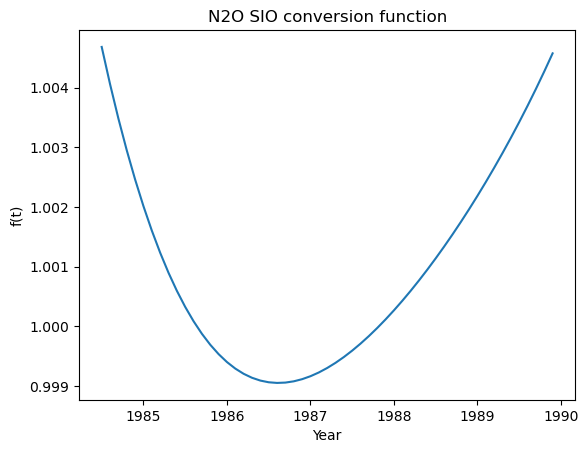

In [25]:
# Plot this function
x_vals = np.arange(1984.5, 1990., 0.1)
ftx_lambda = sp.lambdify(x, ftx, "numpy")

y_vals = ftx_lambda(x_vals)

plt.plot(x_vals, y_vals)
plt.xlabel('Year') 
plt.ylabel('f(t)')
plt.title('N2O SIO conversion function')
plt.show()

In [24]:
# Now lets write this out with t as the independent variable (just because that's what the csv file is expecting)
str(sp.simplify(ftx.subs(x, t)))

'-1.0058/(2.0742e-5*t**4 - 0.164988416365503*t**3 + 492.139076353223*t**2 - 652439.175571644*t + 324357376.070416)'